In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#Import Data
#The full dataset has 356027 entries -> using subset 100'000
df = pd.read_csv('en.openfoodfacts.org.products.tsv',nrows=100000,low_memory=False,sep='\t')

In [3]:
# Data Cleaning
# -> many columns are empty, therefore not used anymore -> delete
#Thresold min 100
df.dropna(thresh=100, axis=1,inplace=True)
dfNum=df.select_dtypes(include=['number'])
dd=dfNum.loc[:,['carbohydrates_100g','salt_100g', 'zinc_100g','fat_100g','taurine_100g', 'magnesium_100g' ,'phosphorus_100g','calcium_100g','potassium_100g','folates_100g' ]]
filter0 = dd > 100
filter_any=filter0.any(axis=1)
outliers = df.loc[filter_any, :]
df = df.drop(outliers.index, axis=0)

B. Manipulating the data

You will work with the data to investigate some properties of your choice. Your goal is to
choose 3 interesting questions to answer about the data and perform the necessary
steps for the analysis.
The questions that you choose must be complex enough to allow for some substantial
data manipulation. As a guideline here is a sample topic of analysis

Topic: Investigate the macronutrient breakdown across various foods (this is the
percentage of calories that come from the 3 macronutrient groups: carbohydrates,
protein and fats). 


What are the foods that have the highest ratios of each macronutrient? 

In [4]:
# Colum: highest 'carbohydrates_100g' , 
dd=df.sort_values(by=['carbohydrates_100g'], ascending=False, kind="quicksort")
dd.loc[:,['product_name','carbohydrates_100g']].head(5)

,product_name,carbohydrates_100g
57772,Zero Calorie Sweetener,100.0
38055,"Shoppers Value, Non-Dairy Creamer",100.0
68919,Demerara Cane Sugar,100.0
44396,Butterscotch Discs Candy,100.0
37590,"Sugar Sweetened Iced Tea Mix, Raspberry Flavor...",100.0


In [5]:
# Colum: highest 'proteins_100g' , 
dd=df.sort_values(by=['proteins_100g'], ascending=False, kind="quicksort")
dd.loc[:,['product_name','proteins_100g']].head(5)

,product_name,proteins_100g
41366,Gelatin,100.0
41365,Unflavored Gelatin,100.0
71739,Unflavored Gelatin,100.0
90840,Garlic Powder,100.0
2919,Unflavored Gelatin,100.0


In [6]:
# Colum: highest 'fat_100g' , 
dd=df.sort_values(by=['fat_100g'], ascending=False, kind="quicksort")
dd.loc[:,['product_name','fat_100g']].head(5)

,product_name,fat_100g
5918,Canola Oil,100.0
19782,Organic Peanut Oil,100.0
37382,Lard,100.0
19777,Canola & Coconut Oil Blend,100.0
89567,All Purpose Vegetable Shortening,100.0


What are the foods that are most balanced? 

In [7]:
#What are the foods that are most balanced? 
#Filter 'carbohydrates_100g' 30-50
d1=df[(df['carbohydrates_100g']>30) & (df['carbohydrates_100g']<50)]
d1.loc[:,['product_name','carbohydrates_100g','proteins_100g','fat_100g']].head(3)

,product_name,carbohydrates_100g,proteins_100g,fat_100g
12,Zen Party Mix,36.67,16.67,36.67
13,Organic Golden Flax Seeds,38.10,19.05,42.86
20,Energy Power Mix,42.50,7.50,17.50


In [8]:
#Filter 'proteins_100g' 30-50
d1=df[(df['proteins_100g']>30) & (df['proteins_100g']<50)]
d1.loc[:,['product_name','carbohydrates_100g','proteins_100g','fat_100g']].head(3)

,product_name,carbohydrates_100g,proteins_100g,fat_100g
14,Organic Spicy Punks,15.15,30.3,48.48
188,Pâté au poulet,16.60,33.9,10.20
248,Marmite Original Pate A Tartiner 125G,24.00,39.0,1.00


In [9]:
#Filter 'fat_100g' 30-50
d1=df[(df['fat_100g']>30) & (df['fat_100g']<50)]
d1.loc[:,['product_name','carbohydrates_100g','proteins_100g','fat_100g']].head(3)

,product_name,carbohydrates_100g,proteins_100g,fat_100g
8,Organic Dark Chocolate Minis,55.00,5.00,37.50
12,Zen Party Mix,36.67,16.67,36.67
13,Organic Golden Flax Seeds,38.10,19.05,42.86


In [10]:
# ->  foods that are most balanced: 
#Zen Party Mix, Organic Golden Flax Seeds

What is the macronutrient breakdown across different countries? 
Can you notice some trends or insights about the data?

Choose appropriate visual methods to communicate your
fndings.

In [11]:
group=df.groupby('countries_en')
#list(group)
#print(group.describe())
#print(group.mean())
#print(group.size())

In [12]:
# Examine amount of Products per country
s=group.size()
s2 = s.sort_values(ascending=False,kind="quicksort")
s2.head(15)

countries_en
United States            96471
France                    1350
Canada                     665
United Kingdom             479
France,United Kingdom      219
France,United States       115
Switzerland                 89
Australia                   50
Germany                     44
Canada,United States        24
Spain                       23
Canada,France               22
Taiwan                      16
Mexico                      15
Belgium                     13
dtype: int64

In [13]:
# -> Using top3 for further analysis

In [14]:
# Data United States about macronutrient
dataUS=group.get_group('United States')
dataUS.loc[:,['carbohydrates_100g','proteins_100g','fat_100g','countries_en']].head(3)

,carbohydrates_100g,proteins_100g,fat_100g,countries_en
1,64.29,3.57,28.57,United States
2,60.71,17.86,17.86,United States
3,17.86,17.86,57.14,United States


In [15]:
# Data France about macronutrient
dataFrance=group.get_group('France')
dataFrance.loc[:,['carbohydrates_100g','proteins_100g','fat_100g','countries_en']].head(3)

,carbohydrates_100g,proteins_100g,fat_100g,countries_en
0,NaN,NaN,NaN,France
46,NaN,NaN,NaN,France
47,NaN,NaN,NaN,France


In [16]:
# Data United Kingdom about macronutrient
dataUK=group.get_group('United Kingdom')
dataUK.loc[:,['carbohydrates_100g','proteins_100g','fat_100g','countries_en']].head(3)

,carbohydrates_100g,proteins_100g,fat_100g,countries_en
48,NaN,NaN,NaN,United Kingdom
155,NaN,NaN,NaN,United Kingdom
156,NaN,NaN,NaN,United Kingdom


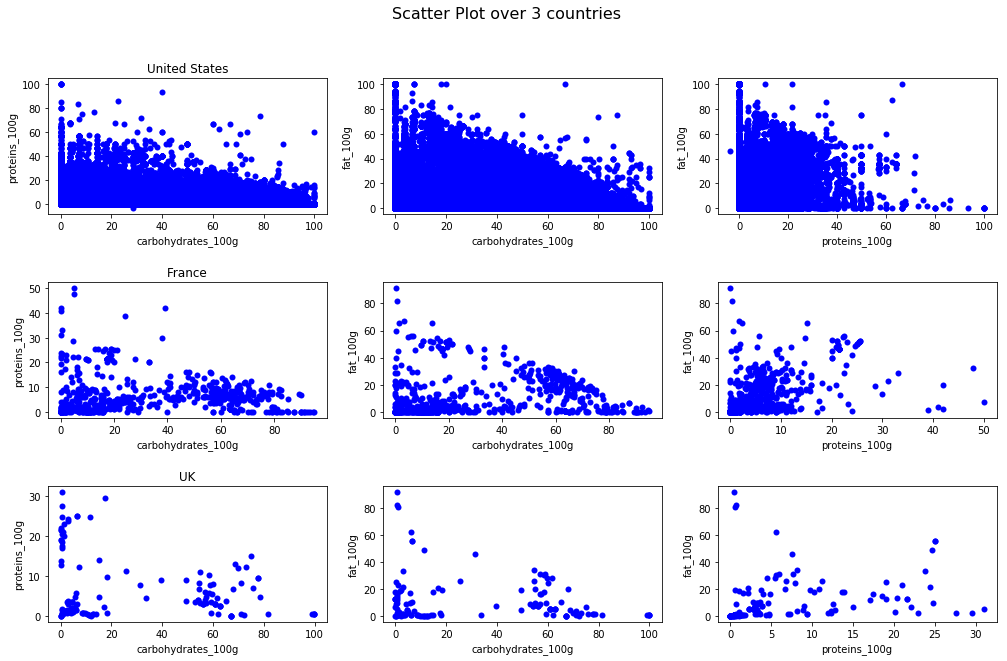

In [17]:
#Scatter Plot 
plt.figure(1)
plt.figure(figsize=(17,10))
#Data United States
plt.subplot(3,3,1)
plt.scatter(x=dataUS['carbohydrates_100g'], y=dataUS['proteins_100g'],color='blue', linewidths=0.01)
plt.title('United States')
plt.xlabel('carbohydrates_100g')
plt.ylabel('proteins_100g')
plt.subplot(3,3,2)
plt.scatter(x=dataUS['carbohydrates_100g'], y=dataUS['fat_100g'],color='blue', linewidths=0.01)
plt.xlabel('carbohydrates_100g')
plt.ylabel('fat_100g')
plt.subplot(3,3,3)
plt.scatter(x=dataUS['proteins_100g'], y=dataUS['fat_100g'],color='blue', linewidths=0.01)
plt.xlabel('proteins_100g')
plt.ylabel('fat_100g')
plt.subplots_adjust(hspace=0.5)
#Data France
plt.subplot(3,3,4)
plt.title('France')
plt.scatter(x=dataFrance['carbohydrates_100g'], y=dataFrance['proteins_100g'],color='blue', linewidths=0.01)
plt.xlabel('carbohydrates_100g')
plt.ylabel('proteins_100g')
plt.subplot(3,3,5)
plt.scatter(x=dataFrance['carbohydrates_100g'], y=dataFrance['fat_100g'],color='blue', linewidths=0.01)
plt.xlabel('carbohydrates_100g')
plt.ylabel('fat_100g')
plt.subplot(3,3,6)
plt.scatter(x=dataFrance['proteins_100g'], y=dataFrance['fat_100g'],color='blue', linewidths=0.01)
plt.xlabel('proteins_100g')
plt.ylabel('fat_100g')
plt.subplots_adjust(hspace=0.5)
#Data UK
plt.subplot(3,3,7)
plt.title('UK')
plt.scatter(x=dataUK['carbohydrates_100g'], y=dataUK['proteins_100g'],color='blue', linewidths=0.01)
plt.xlabel('carbohydrates_100g')
plt.ylabel('proteins_100g')
plt.subplot(3,3,8)
plt.scatter(x=dataUK['carbohydrates_100g'], y=dataUK['fat_100g'],color='blue', linewidths=0.01)
plt.xlabel('carbohydrates_100g')
plt.ylabel('fat_100g')
plt.subplot(3,3,9)
plt.scatter(x=dataUK['proteins_100g'], y=dataUK['fat_100g'],color='blue', linewidths=0.01)
plt.xlabel('proteins_100g')
plt.ylabel('fat_100g')

plt.suptitle('Scatter Plot over 3 countries', fontsize=16)
plt.show()

In [18]:
# ->  trends or insights: US has many more macronutrient data as UK

2)Interesting question:
Which country has the highest macronurtient in average?


In [19]:
# Averages over macronutrients
MeanRegion=pd.pivot_table(df, index = 'countries_en', values=['carbohydrates_100g','proteins_100g','fat_100g'], 
                                        aggfunc= [np.mean] )
MeanRegion.head(5)

mean                       
                              carbohydrates_100g fat_100g proteins_100g
countries_en                                                           
Algeria                                      NaN      NaN           NaN
Armenia                                      NaN      NaN           NaN
Aruba                                        NaN      NaN           NaN
Australia                                36.3125   13.975        5.2625
Australia,Belgium,Switzerland            22.6000    0.400        1.5000

In [20]:
# Drop NaN
print('# NaN = ',MeanRegion.isnull().sum().sum())
print(MeanRegion.shape)
print()
df2=MeanRegion.dropna(axis=0)
print(df2.shape)
print(df2.head(5))
print()
print('# NaN = ',df2.isnull().sum().sum())

# NaN =  180
(140, 3)

(80, 3)
                                                                 mean  \
                                                   carbohydrates_100g   
countries_en                                                            
Australia                                                    36.31250   
Australia,Belgium,Switzerland                                22.60000   
Australia,France                                             58.40000   
Australia,New Zealand,Singapore,Thailand,United...            6.30000   
Australia,United States                                      24.89125   

                                                                           
                                                   fat_100g proteins_100g  
countries_en                                                               
Australia                                           13.9750      5.262500  
Australia,Belgium,Switzerland                        0.4000      1.500000  
Aust

In [21]:
#MultiIndex Structure
df2.columns

MultiIndex(levels=[['mean'], ['carbohydrates_100g', 'fat_100g', 'proteins_100g']],
           labels=[[0, 0, 0], [0, 1, 2]])

In [22]:
#Calculate the highest mean for carbohydrates_100g over countries
df3=df2['mean']['carbohydrates_100g']
df4=df3.sort_values(ascending=False, kind="quicksort").head(5)
df4.head()

countries_en
Panama,United States             94.44
Canada,France,Switzerland        89.30
Canada,France,United States      79.30
China,Switzerland                79.00
Belgium,France,United Kingdom    75.20
Name: carbohydrates_100g, dtype: float64

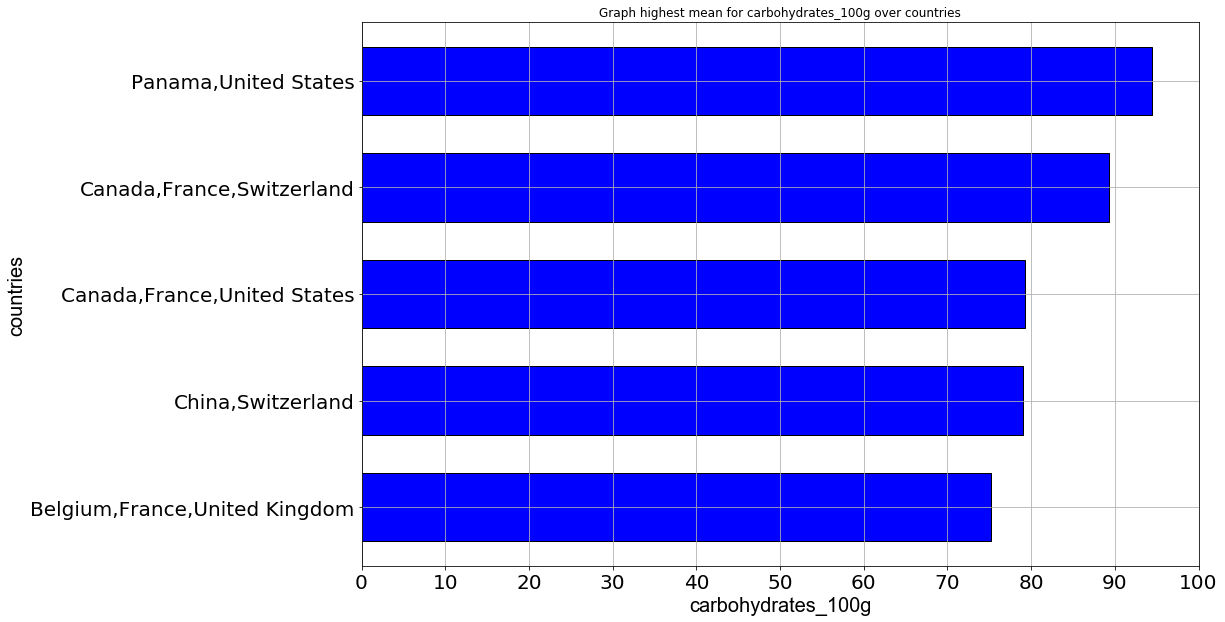

In [23]:
#Graph highest mean for carbohydrates_100g over countries
font={'fontname':'Arial', 'size':'20'}
x_cor = np.linspace(0,100,11)
y_cor = np.linspace(5,0,len(df4))
plt.figure(figsize=(15,10))
plt.grid(True)
plt.ylabel('countries', font)
plt.xlabel("carbohydrates_100g", font)
plt.barh(y_cor,df4,color='blue',edgecolor='black')
plt.yticks(y_cor,df4.index,fontsize = 20)
plt.xticks(x_cor,fontsize = 20)
plt.title("Graph highest mean for carbohydrates_100g over countries")
plt.show()

In [24]:
#Calculate the highest mean for fat_100g over countries
df3=df2['mean']['fat_100g']
df4=df3.sort_values(ascending=False, kind="quicksort").head(5)
df4.head()

countries_en
Serbia                                     100.0
New Caledonia                               91.0
Canada,Portugal                             53.3
Cuba                                        33.0
Canada,France,Switzerland,United States     32.4
Name: fat_100g, dtype: float64

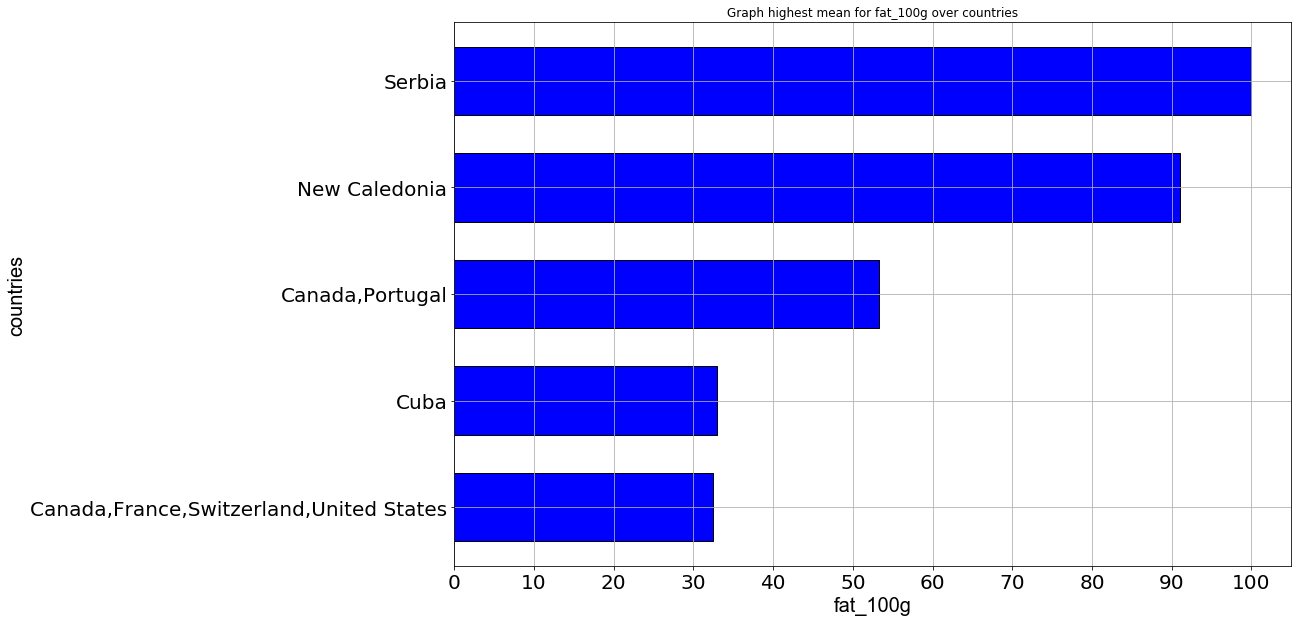

In [25]:
#Graph highest mean for fat_100g over countries
font={'fontname':'Arial', 'size':'20'}
x_cor = np.linspace(0,100,11)
y_cor = np.linspace(5,0,len(df4))
plt.figure(figsize=(15,10))
plt.grid(True)
plt.ylabel('countries', font)
plt.xlabel("fat_100g", font)
plt.barh(y_cor,df4,color='blue',edgecolor='black')
plt.yticks(y_cor,df4.index,fontsize = 20)
plt.xticks(x_cor,fontsize = 20)
plt.title("Graph highest mean for fat_100g over countries")
plt.show()

In [26]:
#Calculate the highest mean for proteins_100g over countries
df3=df2['mean']['proteins_100g']
df4=df3.sort_values(ascending=False, kind="quicksort").head(5)
df4.head()

countries_en
French Polynesia               46.400000
Germany                        45.797368
Canada,Portugal                20.000000
France,Spain,United Kingdom    16.100000
Mexico,United States           14.290000
Name: proteins_100g, dtype: float64

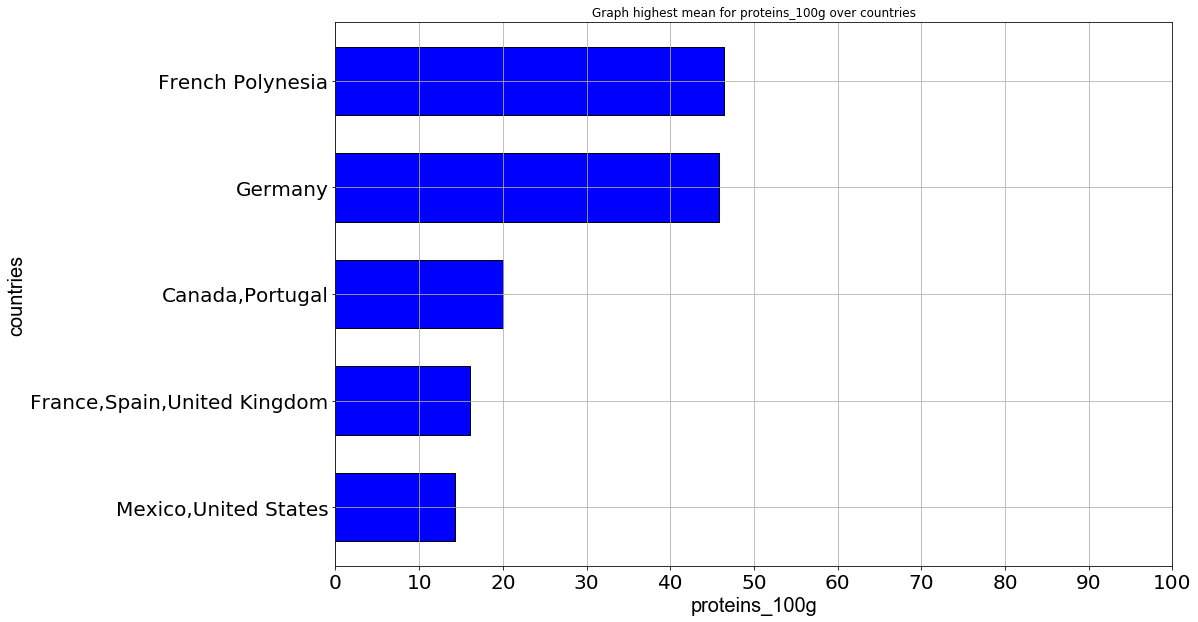

In [27]:
#Graph highest mean for proteins_100g over countries
font={'fontname':'Arial', 'size':'20'}
x_cor = np.linspace(0,100,11)
y_cor = np.linspace(5,0,len(df4))
plt.figure(figsize=(15,10))
plt.grid(True)
plt.ylabel('countries', font)
plt.xlabel("proteins_100g", font)
plt.barh(y_cor,df4,color='blue',edgecolor='black')
plt.yticks(y_cor,df4.index,fontsize = 20)
plt.xticks(x_cor,fontsize = 20)
plt.title("Graph highest mean for proteins_100g over countries")
plt.show()

3)Interesting question:

What ist distribution per macronutrients over all products?

In [28]:
# Extract carbohydrates_100g
s=df.loc[:,['carbohydrates_100g']].unstack()
# Drop NaN
print('# NaN = ',s.isnull().sum().sum())
print(s.shape)
#print()
df2=s.dropna(axis=0)
#print(df2.shape)
#print(df2.head(5))
print()
print('# NaN = ',df2.isnull().sum().sum())

# NaN =  2992
(99924,)

# NaN =  0


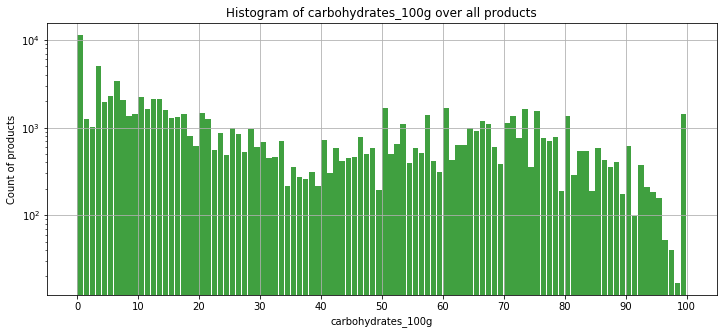

In [29]:
#Histogram carbohydrates_100g
plt.figure(figsize=(12,5))
plt.yscale('log')
plt.grid(True)
x_cor = np.linspace(0,100,11)
plt.hist(df2, 100, histtype='bar', facecolor='g', alpha=0.75,rwidth=0.9)
plt.title('Histogram of carbohydrates_100g over all products')
plt.xticks(x_cor,fontsize = 10)
plt.ylabel("Count of products")
plt.xlabel("carbohydrates_100g")
plt.show()

In [30]:
#carbohydrates_100g -> Many zero values, rest of distribution balanced

In [31]:
# Extract fat_100g
s=df.loc[:,['fat_100g']].unstack()
# Drop NaN
print('# NaN = ',s.isnull().sum().sum())
print(s.shape)
#print()
df2=s.dropna(axis=0)
#print(df2.shape)
#print(df2.head(5))
print()
print('# NaN = ',df2.isnull().sum().sum())

# NaN =  3031
(99924,)

# NaN =  0


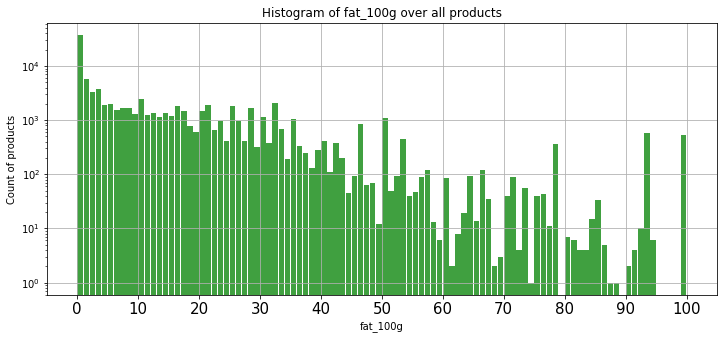

In [32]:
#Histogram fat_100g
plt.figure(figsize=(12,5))
plt.yscale('log')
plt.grid(True)
x_cor = np.linspace(0,100,11)
plt.hist(df2, 100, histtype='bar', facecolor='g', alpha=0.75,rwidth=0.9)
plt.title('Histogram of fat_100g over all products')
plt.xticks(x_cor,fontsize = 15)
plt.ylabel("Count of products")
plt.xlabel("fat_100g")
plt.show()

In [33]:
#fat_100g -> Many zero values, only small amount

In [34]:
# Extract proteins_100g
s=df.loc[:,['proteins_100g']].unstack()
# Drop NaN
print('# NaN = ',s.isnull().sum().sum())
print(s.shape)
#print()
df2=s.dropna(axis=0)
#print(df2.shape)
#print(df2.head(5))
print()
print('# NaN = ',df2.isnull().sum().sum())

# NaN =  2942
(99924,)

# NaN =  0


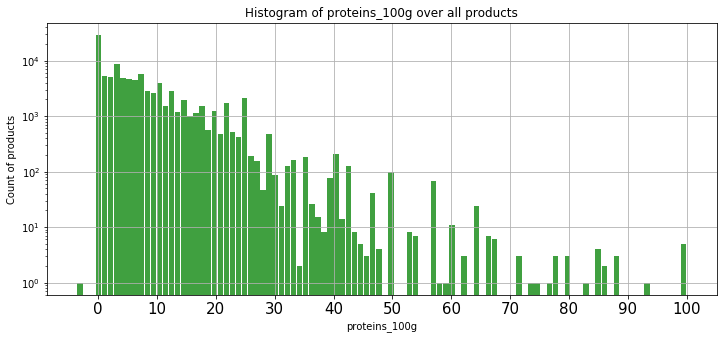

In [35]:
#Histogram proteins_100g
plt.figure(figsize=(12,5))
plt.yscale('log')
plt.grid(True)
x_cor = np.linspace(0,100,11)
plt.hist(df2, 100, histtype='bar', facecolor='g', alpha=0.75,rwidth=0.9)
plt.title('Histogram of proteins_100g over all products')
plt.xticks(x_cor,fontsize = 15)
plt.ylabel("Count of products")
plt.xlabel("proteins_100g")
plt.show()

In [36]:
#proteins_100g -> Many zero values, , only small amount